<div style="text-align:center; border-radius:15px; padding:15px; color:#FFC0CB; margin:0; font-size:150%; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;"><b>Retail Store Inventory Forecasting: Unveiling Patterns and Predictions</b></div>

Retail stores are the lifeblood of the economy, and understanding inventory dynamics can make or break a business. This dataset offers a fascinating glimpse into the world of retail inventory management, with a plethora of variables to explore. Let's dive in and see what insights we can uncover. If you find this notebook useful, don't forget to upvote it.

## Table of Contents
1. [Data Overview](#data-overview)
2. [Data Preprocessing](#data-preprocessing)
3. [Exploratory Data Analysis](#exploratory-data-analysis)
4. [Correlation Analysis](#correlation-analysis)
5. [Predictive Modeling](#predictive-modeling)
6. [Model Evaluation](#model-evaluation)
7. [Discussion and Future Work](#discussion-and-future-work)

## Data Overview
In this section, we'll load the data and take a preliminary look at its structure and contents.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load the dataset
file_path = '../data/retail_store_inventory.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


## Data Preprocessing
Let's clean the data and ensure it's ready for analysis. We'll handle missing values, convert data types, and create any necessary features.

In [2]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check for missing values
missing_values = df.isnull().sum()
missing_values

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

## Exploratory Data Analysis
In this section, we'll explore the data using various visualization techniques to uncover patterns and insights.

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

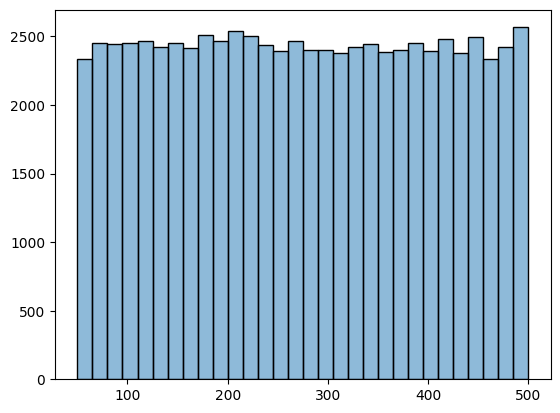

In [3]:
# Distribution of Inventory Levels
sns.histplot(df['Inventory Level'], bins=30, kde=True)
plt.title('Distribution of Inventory Levels')
plt.xlabel('Inventory Level')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Category distribution
sns.countplot(y='Category', data=df)
plt.title('Product Category Distribution')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

## Correlation Analysis
We'll examine the relationships between numeric variables using a correlation heatmap.

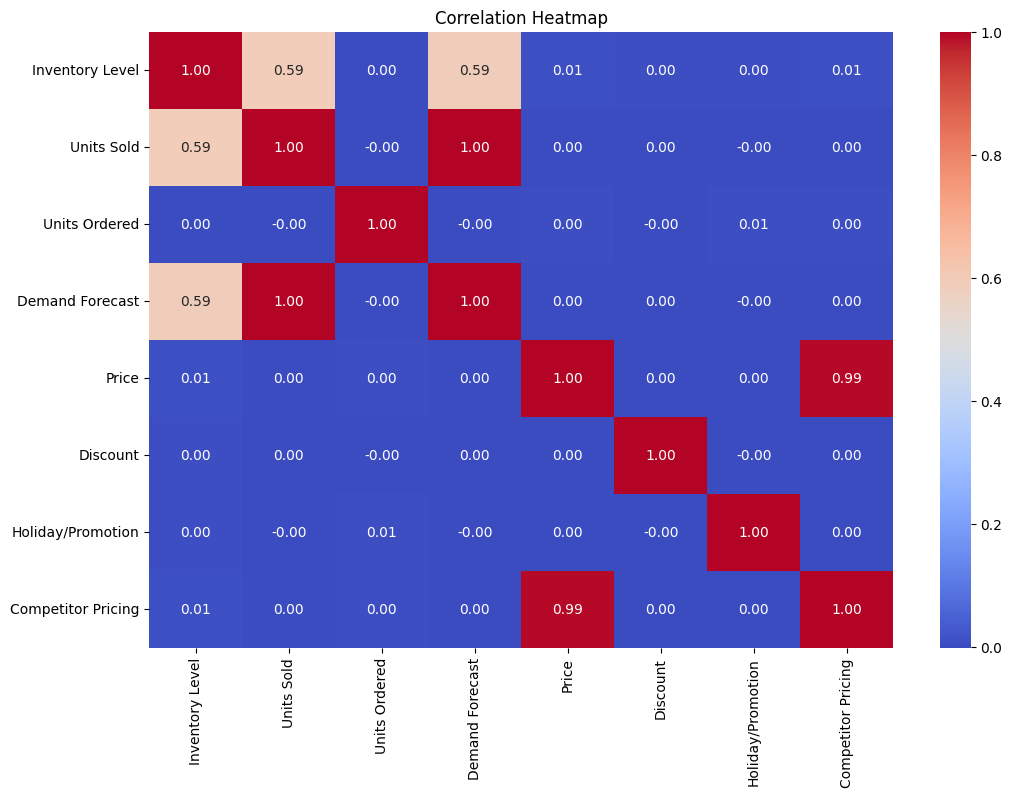

In [4]:
# Select numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Predictive Modeling
Based on the data, we can attempt to predict the 'Units Sold' using other features. Let's build a simple predictive model.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define features and target
features = numeric_df.drop(columns=['Units Sold'])
target = numeric_df['Units Sold']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

## Model Evaluation
Let's evaluate the performance of our predictive model using the test data.

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

## Discussion and Future Work
In this notebook, we explored a retail store inventory dataset, performed data preprocessing, and conducted exploratory data analysis. We also built a predictive model to forecast 'Units Sold' and evaluated its performance.

### Merits of the Approach
- Comprehensive data exploration using visualizations.
- Predictive modeling with a Random Forest Regressor, which is robust to overfitting and handles non-linear relationships well.

### Future Work
- Experiment with other predictive models such as Gradient Boosting or Neural Networks.
- Incorporate time series analysis to capture temporal patterns in the data.
- Perform feature engineering to create new variables that might improve model performance.

If you found this notebook insightful, please consider upvoting it.

## Credits
This notebook was created with the help of [Devra AI data science assistant](https://devra.ai/ref/kaggle)